#### 1. charge데이터를 시계열로 분석 -> ex) 충전금액이 높은 달이 있으면 원인 파악 -> 시계열로 충전 금액 수요예측-> 예산안을 어떻게 편성하면 좋을지에 대한 분석.
#### 2. 예산 증액 + 1년동안 균등하게 예산이 쓰일 수 있도록 방안 제시
#### [2019.04~2021.08(주별 데이터)]

In [47]:
import pandas as pd
charge= pd.read_csv('충전데이터_병합.csv',encoding='cp949')
charge.head(10)

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,USER_ID,SERVICE_NAME,USER_JOIN_DATE,CARD_NO,GENDER,USER_BIRTH_YEAR,USER_ADDRESS,USER_GRADE_TYPE,CHARGE_APPROVAL_DATE,CONNECT_BANK_NAME,CHARGE_AMOUNT,BALANCE_CHARGE_APPROVAL_AMOUNT,BALANCE_CHARGE_CANCEL_AMOUNT,INCENTIVE_CASH_CHARGE_APPROVAL_AMOUNT,INCENTIVE_CASH_CHARGE_CANCEL_AMOUNT,POLICY_CASH_CHARGE_APPROVAL_AMOUNT,POLICY_CASH_CHARGE_CANCEL_AMOUNT,CASH_NAME
0,0,3002083441,포천사랑상품권(정책),20190429,Q1F69E862CF295FF8131211232A,여,1987,NONE,정회원,20190429,IBK기업은행,10000,10000,0,0,0,0,0,NONE
1,1,3002092217,포천사랑상품권(정책),20190430,Q1A9816BB2F2960257C1DBB21DE,여,1993,경기도 포천시 영북면 영북로 206 (산내들 아이파크),정회원,20190430,IBK기업은행,500000,0,0,0,0,500000,0,포천사랑상품권 산후조리비
2,2,3002078044,포천사랑상품권(정책),20190429,Q18197A23EF295FED72805E4C97,여,1992,경기도 포천시 영북면 영북로 210 (산내들 아파트),정회원,20190430,카카오뱅크,500000,0,0,0,0,500000,0,포천사랑상품권 산후조리비
3,3,3002140390,포천사랑상품권(정책),20190504,Q1D6B84229F295FA890C2FAF1CC,여,1994,경기도 의정부시 의정부동 199-10 우미쁘띠린,정회원,20190504,우리은행,250000,0,0,0,0,250000,0,포천사랑상품권 청년배당
4,4,3002143571,포천사랑상품권(정책),20190505,Q13AA2CB81F295F3AEDB1AB017D,여,1988,NONE,정회원,20190505,NONE,500000,0,0,0,0,500000,0,포천사랑상품권 산후조리비
5,5,3002142120,포천사랑상품권(정책),20190504,Q1F585330EF295F719C9859A951,여,1994,NONE,정회원,20190504,NONE,250000,0,0,0,0,250000,0,포천사랑상품권 청년배당
6,6,3002124769,포천사랑상품권(정책),20190503,Q1D1B6BB55F29602120BEAD7F95,여,1992,경기도 포천시 일동면 운악청계로 1772 (일동기산베스트빌아파트),정회원,20190503,NONE,500000,0,0,0,0,500000,0,포천사랑상품권 산후조리비
7,7,3002141467,포천사랑상품권(정책),20190505,Q198A1F5BFF295F9CD47D96E3EA,여,1994,경기도 포천시 영중면 먼재길 87,정회원,20190505,지역농축협,250000,0,0,0,0,250000,0,포천사랑상품권 청년배당
8,8,3002142591,포천사랑상품권(정책),20190505,Q18DA56112F295F9A5510DE66C5,남,1994,경기도 포천시 영북면 영북로177번길 33,정회원,20190505,IBK기업은행,250000,0,0,0,0,250000,0,포천사랑상품권 청년배당
9,9,3002141282,포천사랑상품권(정책),20190504,Q11387D1B0F295F6CDB1AD0C668,여,1994,경기도 포천시 신북면 호국로 1886-27 (산호기지그린빌아파트),정회원,20190504,NONE,250000,0,0,0,0,250000,0,포천사랑상품권 청년배당


In [48]:
#https://magoker.tistory.com/105?category=864781

In [49]:
import datetime
charge['CHARGE_APPROVAL_DATE']= charge['CHARGE_APPROVAL_DATE'].astype(str)
charge['CHARGE_APPROVAL_DATE']=pd.to_datetime(charge['CHARGE_APPROVAL_DATE'])
charge['CHARGE_APPROVAL_month']=charge['CHARGE_APPROVAL_DATE'].dt.strftime('%Y-%m')
gr_charge = charge.groupby('CHARGE_APPROVAL_month').sum()['CHARGE_AMOUNT'].to_frame()
gr_charge1=gr_charge.reset_index()
gr_charge1

,CHARGE_APPROVAL_month,CHARGE_AMOUNT
0,2019-04,1.501000e+07
1,2019-05,2.841968e+08
2,2019-06,1.024820e+08
3,2019-07,3.418750e+08
4,2019-08,4.882270e+07
5,2019-09,4.941001e+07
6,2019-10,3.615477e+08
7,2019-11,5.320752e+07
8,2019-12,4.663565e+08
9,2020-01,1.528545e+08


In [50]:
#충전금액이 가장 많았던 년도/월 3건
gr_charge1.sort_values('CHARGE_AMOUNT',ascending=False).reset_index(drop=True).head(3)

,CHARGE_APPROVAL_month,CHARGE_AMOUNT
0,2020-05,7.794700e+10
1,2021-02,1.518013e+10
2,2021-03,9.497924e+09


#### WHY?
#### →  2020년 05월 : 1차 재난지원금
#### →  2021년 02월, 3월 : 포천시 2차 재난기본소득 지급(2/1~3/14 신청) 30만원

In [51]:
#충전금액이 가장 적었던 년도/월 3건
gr_charge1.sort_values('CHARGE_AMOUNT',ascending=True).reset_index(drop=True).head(3)

,CHARGE_APPROVAL_month,CHARGE_AMOUNT
0,2019-04,15010000.0
1,2019-08,48822702.0
2,2019-09,49410008.0


#### → 경기지역화폐가 2019년 처음 발행되어, 활성화되지않아 2019년 전반적으로 충전금액이 낮음

In [52]:
gr_charge1['CHARGE_APPROVAL_month']=pd.to_datetime(gr_charge1['CHARGE_APPROVAL_month'])

<function matplotlib.pyplot.show(close=None, block=None)>

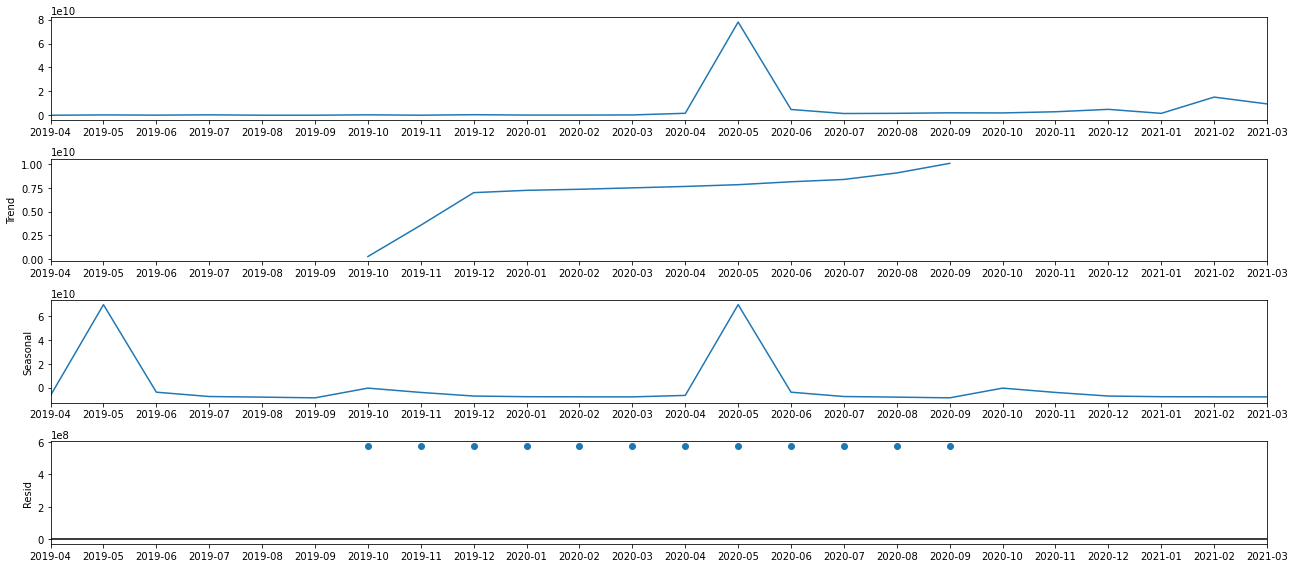

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pylab import rcParams
import statsmodels.api as sm
import warnings
import itertools
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

#train데이터로 2019년4월 ~ 2021년3월 데이터사용
#test데이터로 2021년 4월 ~ 2021년8월 데이터사용
gr_charge_train = gr_charge[:'2021-03']
gr_charge_test = gr_charge['2021-03':]
gr_charge_test_final=gr_charge_test.copy()

rcParams['figure.figsize'] = 18,8
decomposition = seasonal_decompose(gr_charge_train,model='additive',period=12)
fig = decomposition.plot()
plt.show

In [84]:
!pip install pmdarima

In [85]:
from pmdarima import auto_arima
stepwise_model = auto_arima(gr_charge_train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=False,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1158.370, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1165.298, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1161.564, Time=0.00 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1156.409, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1163.327, Time=0.00 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1160.419, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1160.983, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1153.961, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1155.942, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1157.341, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1159.595, Time=0.00 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1159.126, Time=0.01 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.134 seconds


C:\Users\user\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


#### → ARIMA 모형을 위한 최적의 파라미터값 산출 ARIMA(0,1,0)

In [87]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(gr_charge.CHARGE_AMOUNT, order=(0,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:        D.CHARGE_AMOUNT   No. Observations:                   28
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -696.407
Method:                       css-mle   S.D. of innovations    14431685372.130
Date:                Fri, 17 Dec 2021   AIC                           1398.814
Time:                        17:22:43   BIC                           1402.811
Sample:                    05-01-2019   HQIC                          1400.036
                         - 08-01-2021                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3.907e+06   3.23e+08      0.012      0.990    -6.3e+08    6.37e+08
ma.L1.D.CHARGE_AMOUNT    -0.9998      0.141     -7.084      0.000      -1.276      -0.723
        

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will

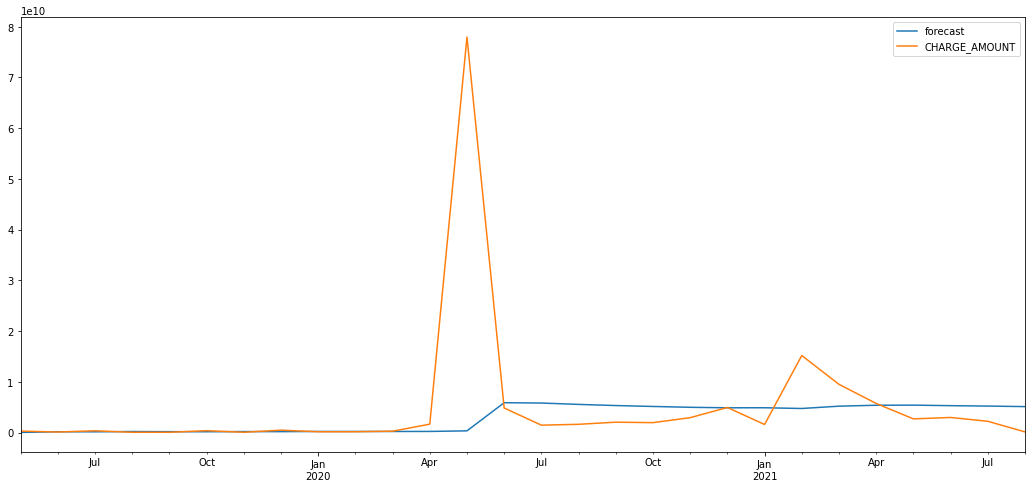

In [88]:
model_fit.plot_predict(dynamic=False)

plt.show()

4338197835.886008


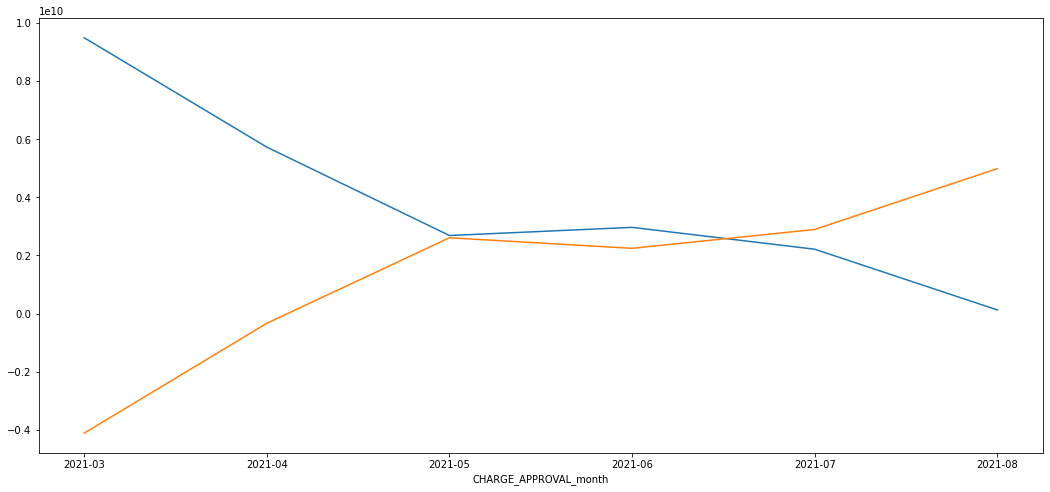

In [89]:
# 2021년 4월~8월 5개월 데이터로 예측
ARIMA_predict = model_fit.predict(start='2021-04',end='2021-09')
ARIMA_predict.index = gr_charge_test_final.index

# 결과 비교를 위해 기존에 마련해둔 test데이터에 결과를 붙임
gr_charge_test_final['ARIMA'] = ARIMA_predict

# RMSE를 살펴 봄
RMSE_Month_ARIMA  = np.mean(np.sqrt((gr_charge_test_final['ARIMA'] - gr_charge_test_final['CHARGE_AMOUNT']) ** 2)) 
print(RMSE_Month_ARIMA)

gr_charge_test_final['CHARGE_AMOUNT'].plot()
gr_charge_test_final['ARIMA'].plot()
plt.show()

#### 파란선이 실제값, 노란선이 예측값

<AxesSubplot:>

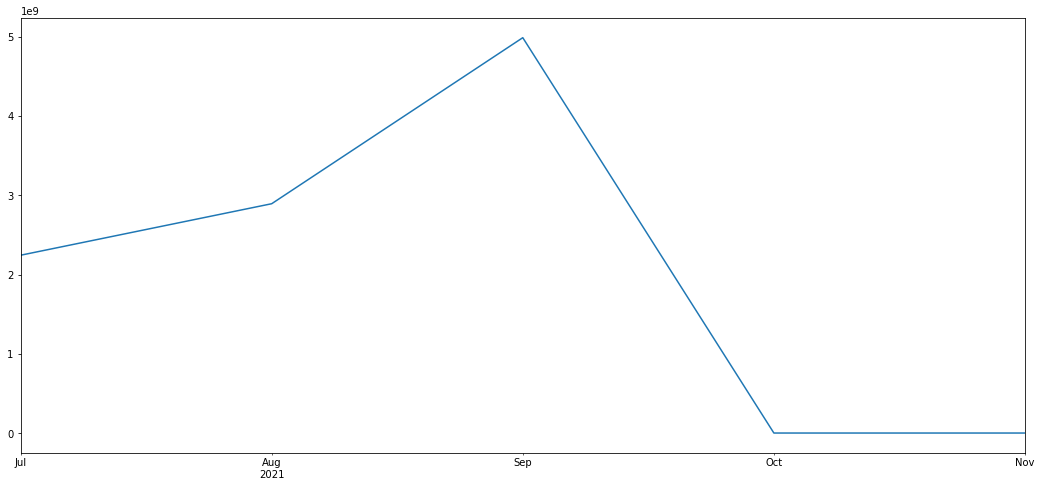

In [90]:
#2022년 1개년 충전금액 예측
ARIMA_predict_2022 = model_fit.predict(start='2021-07',end='2021-11')
ARIMA_predict_2022.plot()

In [81]:
ARIMA_predict_2022=ARIMA_predict_2022.to_frame()
ARIMA_predict_2022

,0
2021-07-01,2.246163e+09
2021-08-01,2.895671e+09
2021-09-01,4.989652e+09
2021-10-01,3.907471e+06
2021-11-01,3.907471e+06


In [23]:
#2022년에는 394억 가량 재난지원금충전수요 예측
SARIMA_predict_2022['predicted_mean'].sum()

39494709373.503525

In [24]:
#포천시 코로나19위기극복으로 409억 추경예산 편성
#2020년도 코로나 발생해에는 포천시에서 993억 가량 재난지원금 충전함
gr_charge1.loc[gr_charge1['CHARGE_APPROVAL_month'].dt.year==2020]['CHARGE_AMOUNT'].sum()

99933304924.0

In [25]:
a=pd.DataFrame({'charge_amount':[gr_charge1.loc[gr_charge1['CHARGE_APPROVAL_month'].dt.year==2020]['CHARGE_AMOUNT'].sum(),SARIMA_predict_2022['predicted_mean'].sum()]},index=['2020','2022(예측)'])
a

,charge_amount
2020,9.993330e+10
2022(예측),3.949471e+10


<AxesSubplot:xlabel='year', ylabel='charge_amount'>

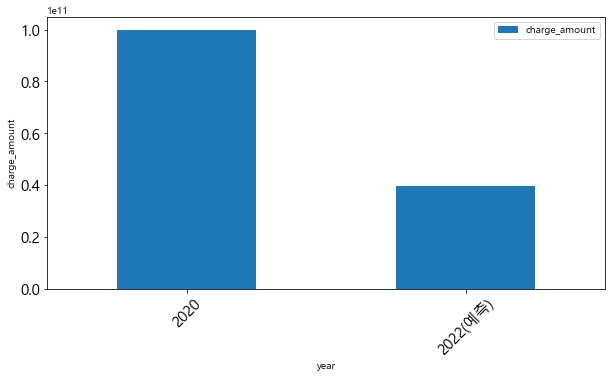

In [26]:
plt.rc('font', family="Malgun Gothic") 
a.plot.bar(xlabel='year',ylabel='charge_amount',fontsize=15,rot=45,figsize=(10,5))